In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import diptest

from scipy.optimize import curve_fit
from sklearn.mixture import GaussianMixture

from utils import *

In [2]:
a, a_err = (3.1304347826086867e-06, 3.1304347826086867e-06) # meter per pulse
resolution, resolution_err = 0.018835915624440338, 0.00012187430782578249

## Loop


Converged with chi-squared 14633.68
Number of degrees of freedom, dof = 84.00
Reduced chi-squared 174.21

Parameter # | Initial guess values:    | Best fit values:         | Uncertainties in the best fit values:
0           | 1.000e+01                | 7.558e+00                | 2.250e-02               
1           | 1.500e-01                | 1.763e-01                | 3.054e-05               
2           | 2.000e-02                | 1.323e-02                | 3.531e-05               
3           | 1.000e+01                | 8.656e+00                | 7.013e-02               
4           | 1.000e-01                | 1.537e-01                | 8.152e-04               
5           | 1.000e-01                | 1.093e-01                | 1.345e-03               

Converged with chi-squared 15013.67
Number of degrees of freedom, dof = 84.00
Reduced chi-squared 178.73

Parameter # | Initial guess values:    | Best fit values:         | Uncertainties in the best fit values:
0           | 1.

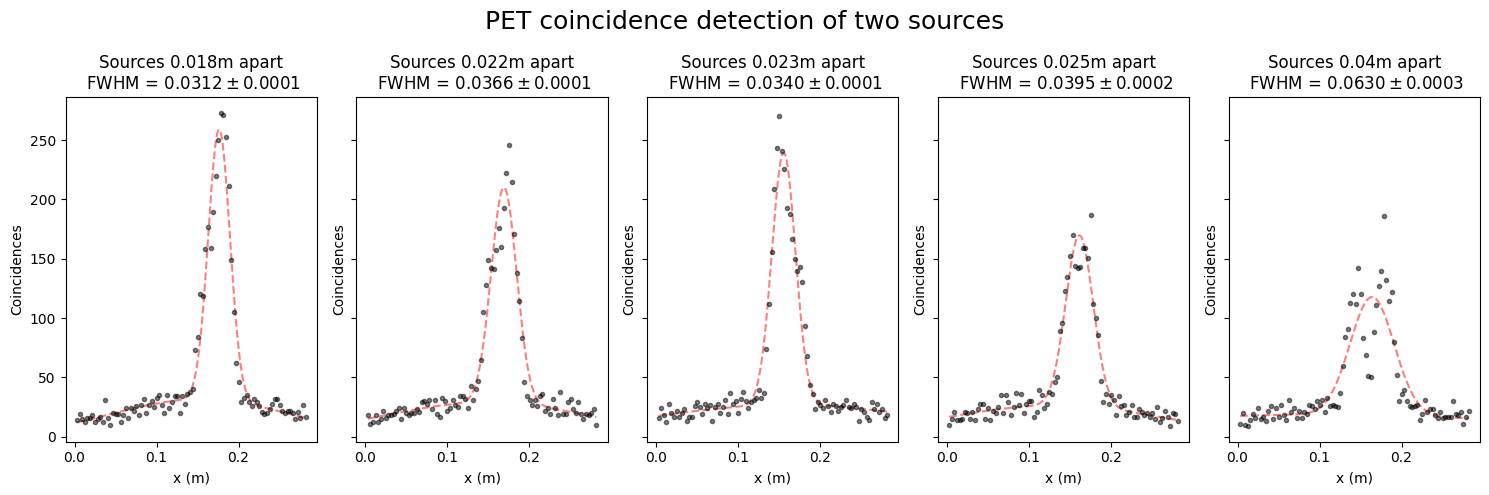

In [16]:
fnames = ['./data/two_18.csv', './data/two_22.csv', './data/two_23.csv', './data/two_25.csv', './data/two_40.csv']
separations = [0.018, 0.022, 0.023, 0.025, 0.040]
fig, axs = plt.subplots(1, len(fnames), figsize=(len(fnames) * 3, 5), sharex=True, sharey=True)

fwhms, fwhm_errs = [], []
for fname, separation, ax in zip(fnames, separations, axs):
    
    data = pd.read_csv(fname)
    data['x'] *= a

    params_i = [10, 0.15, 0.02, 10, 0.1, 0.1]
    params, params_err, chisq, dof = data_fit(
        params_i, bigaussian, 
        data['x'], data['coincidences'], np.ones_like(data['coincidences'])
    )

    linspace = np.linspace(data['x'].min(), data['x'].max(), num=1000)
    curve = bigaussian(params, linspace)

    fwhm = 2 * np.sqrt(2 * np.log(2)) * params[2]
    fwhm_err = 2 * np.sqrt(2 * np.log(2)) * params_err[2]
    fwhms.append(fwhm)
    fwhm_errs.append(fwhm_err)

    ax.errorbar(
        data['x'], 
        data['coincidences'], 
        fmt='k.', alpha=0.5,
    )
    ax.plot(linspace, curve, color='r', linestyle='dashed', alpha=0.5)

    ax.set_xlabel('x (m)')
    ax.set_ylabel('Coincidences')
    ax.set_title(f'Sources {separation}m apart\n FWHM = ${fwhm:.4f} \\pm {fwhm_err:.4f}$')

fig.suptitle('PET coincidence detection of two sources', fontsize=18)
plt.tight_layout()


Converged with chi-squared 1198.59
Number of degrees of freedom, dof = 3.00
Reduced chi-squared 399.53

Parameter # | Initial guess values:    | Best fit values:         | Uncertainties in the best fit values:
0           | 1.000e+00                | 1.260e+00                | 1.363e-02               
1           | 0.000e+00                | 7.585e-03                | 2.972e-04               


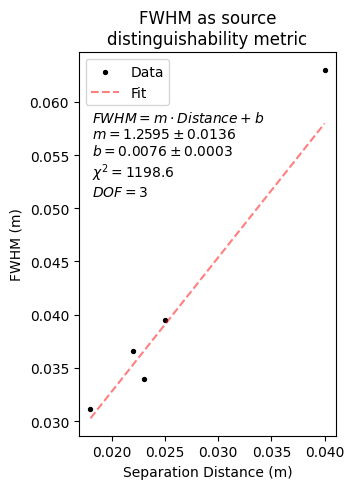

In [22]:
fig, ax = plt.subplots(figsize=(5, 5))

params_i = [1., 0.]
params, params_err, chisq, dof = data_fit(
    params_i, linear, 
    np.array(separations), fwhms, fwhm_errs
)

ax.scatter(separations, fwhms, color='k', s=8, label='Data')

linspace = np.linspace(min(separations), max(separations), 1000)
curve = linear(params, linspace)
ax.plot(linspace, curve, color='r', linestyle='dashed', alpha=0.5, label='Fit')

txt = '$FWHM = m \cdot Distance + b$\n'
txt += f'$m = {params[0]:.4f}\pm{params_err[0]:.4f}$\n'
txt += f'$b = {params[1]:.4f}\pm{params_err[1]:.4f}$\n'
txt += f'$\chi^2 = {chisq:.1f}$\n'
txt += f'$DOF = {dof}$\n'
ax.text(0.05, 0.85, txt, transform=ax.transAxes , fontsize=10, va='top')

ax.set_xlabel('Separation Distance (m)')
ax.set_ylabel('FWHM (m)')
ax.set_aspect('equal')
ax.set_title('FWHM as source\ndistinguishability metric')
ax.legend()

plt.tight_layout()

In [23]:
d = resolution - params[1]
d_err = np.sqrt(resolution_err ** 2 + params_err[1] ** 2)

d_err = (d / params[0]) * np.sqrt((d_err/d) ** 2 + (params_err[0]/params[0]) ** 2)
d /= params[0]

In [24]:
d, d_err

(0.00893237368345028, 0.00027275968564945125)